In [58]:
from functions import read_excel, preprocess_dataframe, describe_dataframe
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# Read the data
df1 = read_excel('idtobank.xlsx')
df2 = read_excel('hashtoid.xlsx')
fraud_data = read_excel('fraud.xlsx', sheet_name='Detail data')

df1 = preprocess_dataframe(df1)
df2 = preprocess_dataframe(df2)

df = pd.concat([df1, df2], ignore_index=True)
fraud_ids = fraud_data['customer_id'].unique()
df['is_fraud'] = df['customer_id'].isin(fraud_ids).astype(object)

df = df.drop_duplicates()
print(len(df.columns))
print(len(fraud_data.columns))

describe_dataframe(df)

57
24
Number of rows: 4063
Number of columns: 57

Column names and data types:
success_redirect_url               object
account_details                    object
expires_at                         object
client                             object
fee                                object
refunded_amount                    object
payment_channel_transaction_id     object
linked_account_id                  object
is_otp_required                    object
otp_mobile_number                  object
settlement_date                    object
failure_code                       object
callback_url                       object
status                             object
channel_account_reference          object
updated                            object
version                            object
checkout_url                       object
vat                                object
client_type                        object
id                                 object
status2                            obje

In [60]:
# Preprocessing

# Drop columns that are not useful for the model
drop_columns = [
    'internal_metadata', 'description','mobile_number', 'otp_mobile_number', 'client_reference',
    'version', 'entity', 'type', 'client', 'status2', 'transacting_entity', 'connector_metadata',
    'vat','currency', 'is_otp_required','fee']

df = df.drop(columns=drop_columns)

# Convert 'is_fraud' to numeric (boolean to int)
df['is_fraud'] = df['is_fraud'].astype(int)

# Convert 'amount' to numeric
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['refunded_amount'] = pd.to_numeric(df['refunded_amount'], errors='coerce')

# Create the bins using pd.qcut
bins = pd.qcut(df['amount'], 20, duplicates='drop', precision=2)

# Assign the bin intervals to the 'amount_bins' column
df['amount_bins'] = bins.astype(str)

# Verify the bins
print(df[['amount', 'amount_bins']].head(20))


# Create the bins using pd.qcut
refunded_bins = pd.qcut(df['refunded_amount'], 20, duplicates='drop', precision=2)

# Assign the bin intervals to the 'amount_bins' column
df['refunded_amount_bins'] = refunded_bins.astype(str)

# Verify the bins
print(df[['refunded_amount', 'refunded_amount_bins']].head(20))

      amount          amount_bins
0   10005.00    (9870.0, 10005.0]
1    3157.82     (3000.0, 4999.0]
2    3157.00     (3000.0, 4999.0]
3    9877.16    (9870.0, 10005.0]
4   20005.00   (20000.0, 20005.0]
5    3981.00     (3000.0, 4999.0]
6   20005.00   (20000.0, 20005.0]
7   20005.00   (20000.0, 20005.0]
8   20005.00   (20000.0, 20005.0]
9   20005.00   (20000.0, 20005.0]
10  20005.00   (20000.0, 20005.0]
11  12353.26  (10829.4, 15050.26]
12  11296.06  (10829.4, 15050.26]
13  10348.26   (10005.0, 10829.4]
14  11296.00  (10829.4, 15050.26]
15  20005.00   (20000.0, 20005.0]
16  20005.00   (20000.0, 20005.0]
17  10005.00    (9870.0, 10005.0]
18   1805.00     (1105.0, 2000.0]
19  10005.00    (9870.0, 10005.0]
    refunded_amount refunded_amount_bins
0               0.0                  nan
1               0.0                  nan
2               0.0                  nan
3               0.0                  nan
4               0.0                  nan
5               0.0                  nan

In [61]:
fraud = df[df['is_fraud'] == 1]
not_fraud = df[df['is_fraud'] == 0]

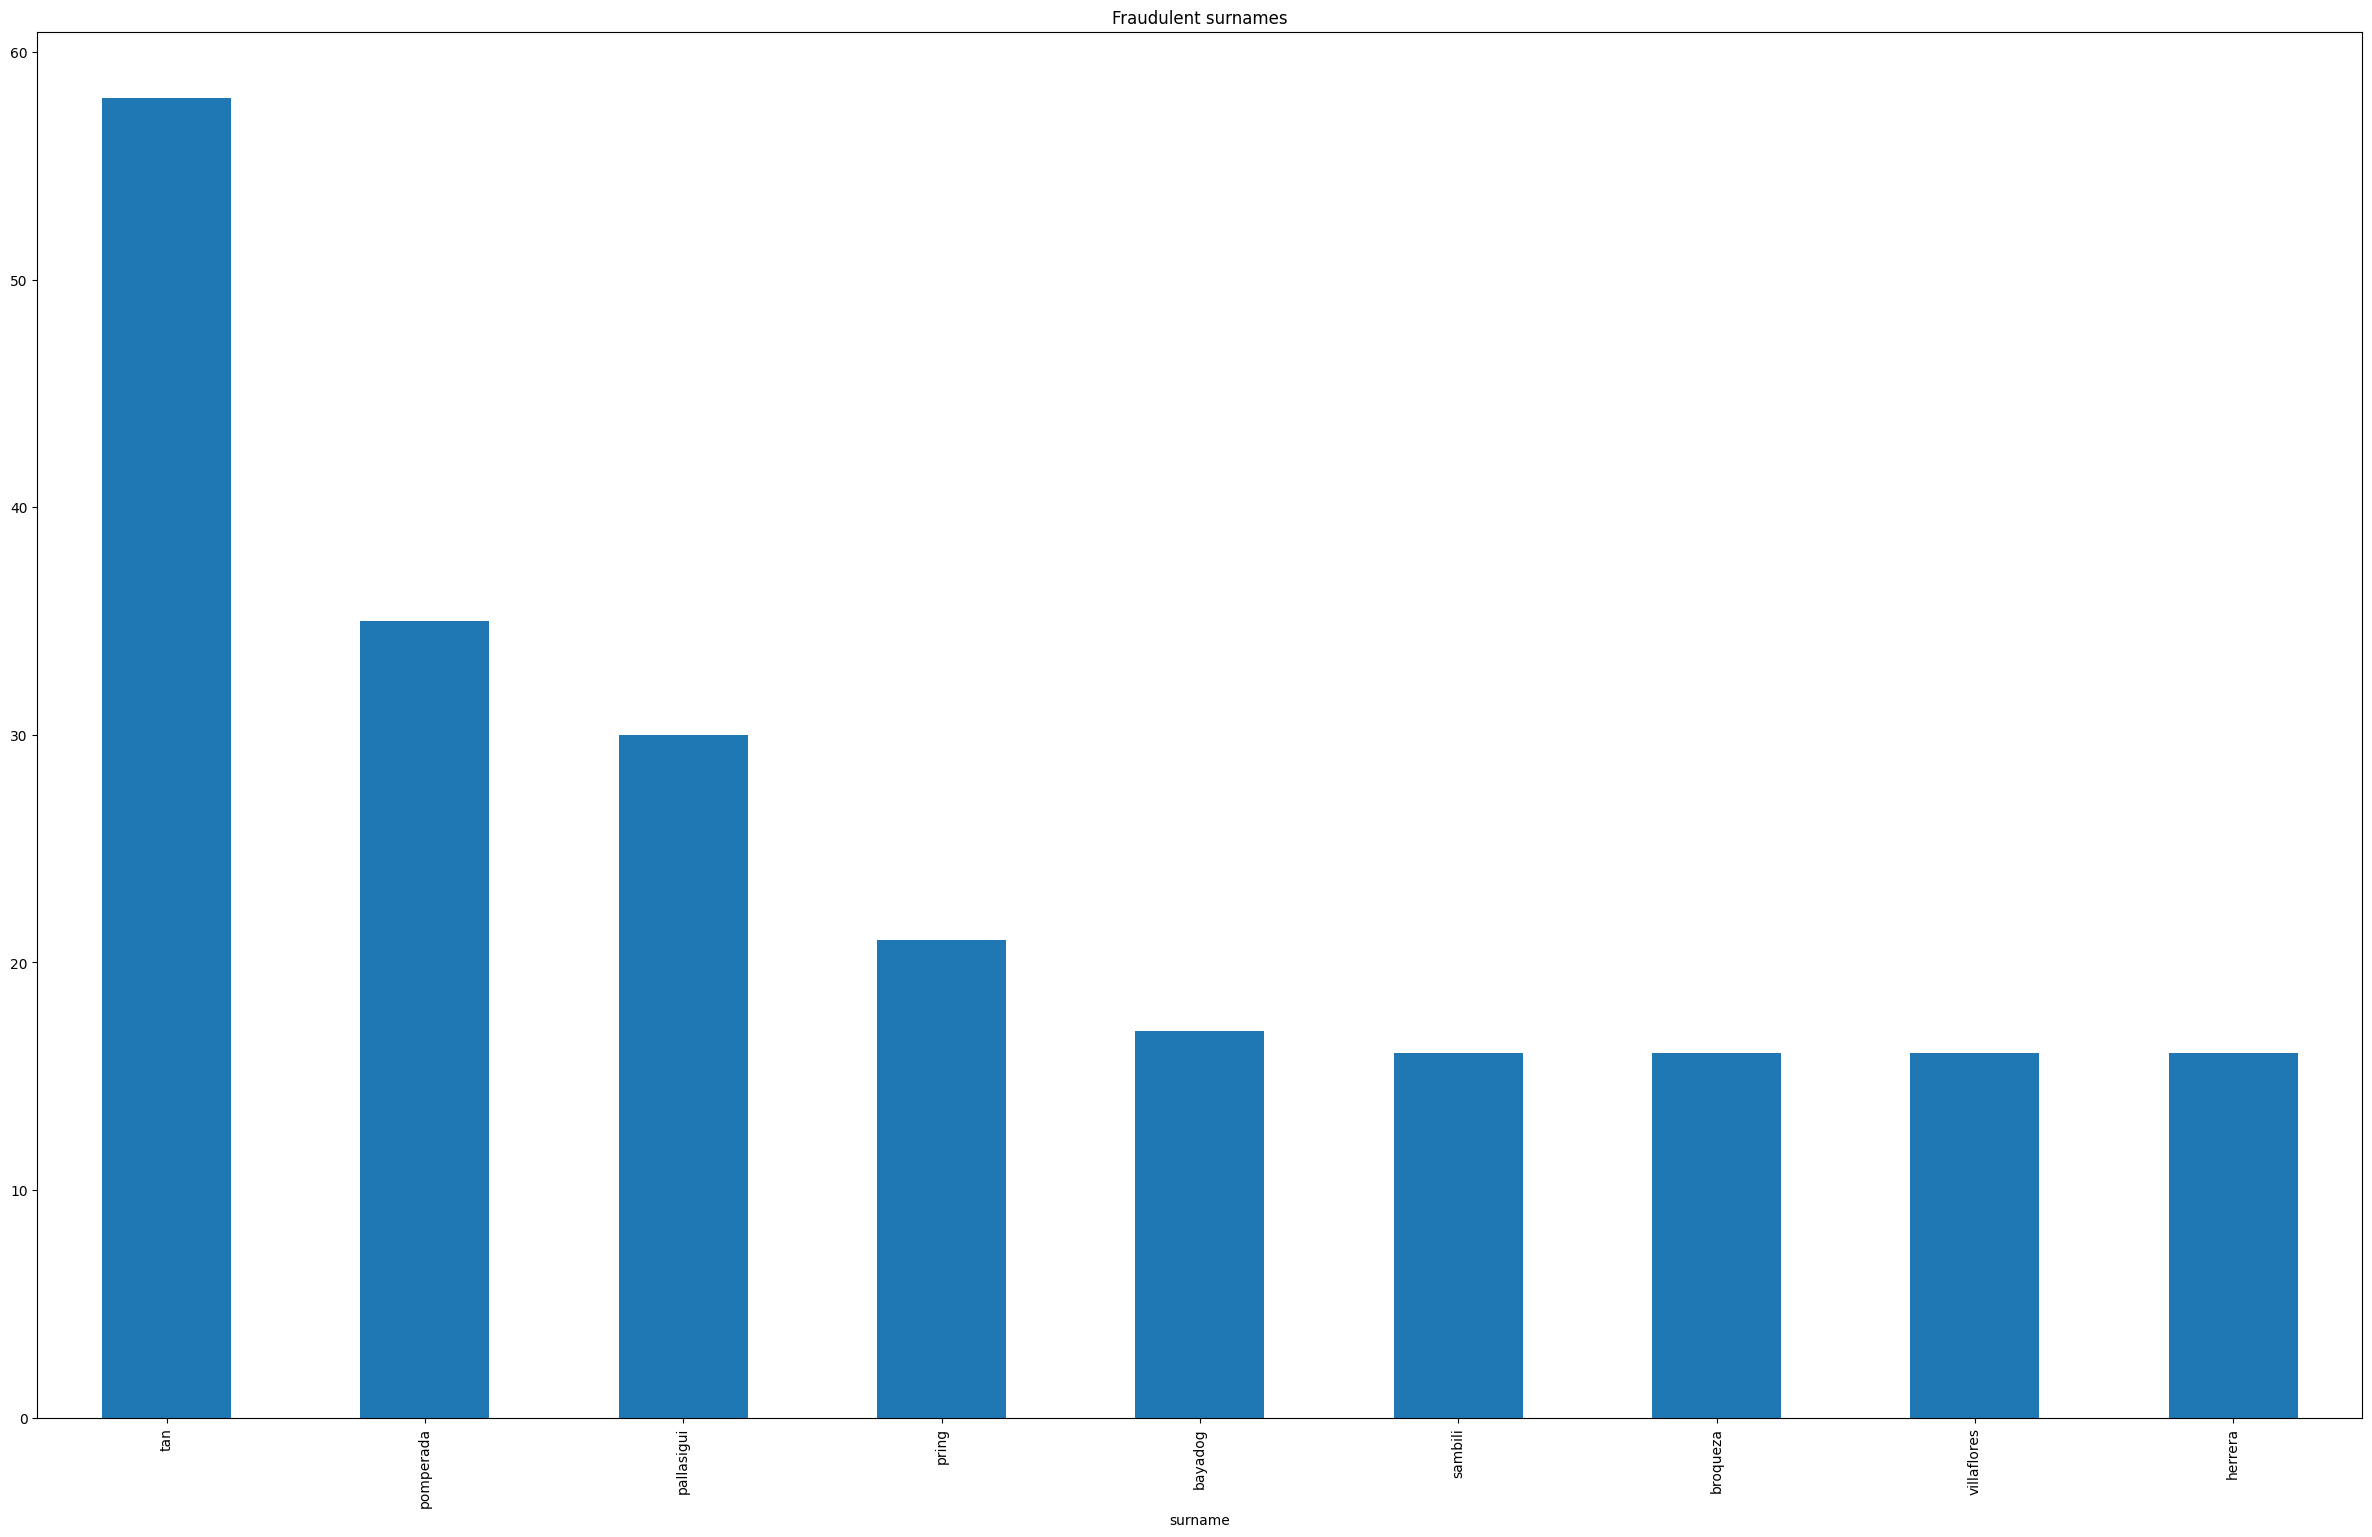

In [62]:
# Plot the number of fraudulent transactions per surname
plt.figure(figsize=(30, 18))
fraud['surname'].value_counts().loc[lambda x: x > 15].plot(kind='bar', title='Fraudulent surnames')
plt.show()


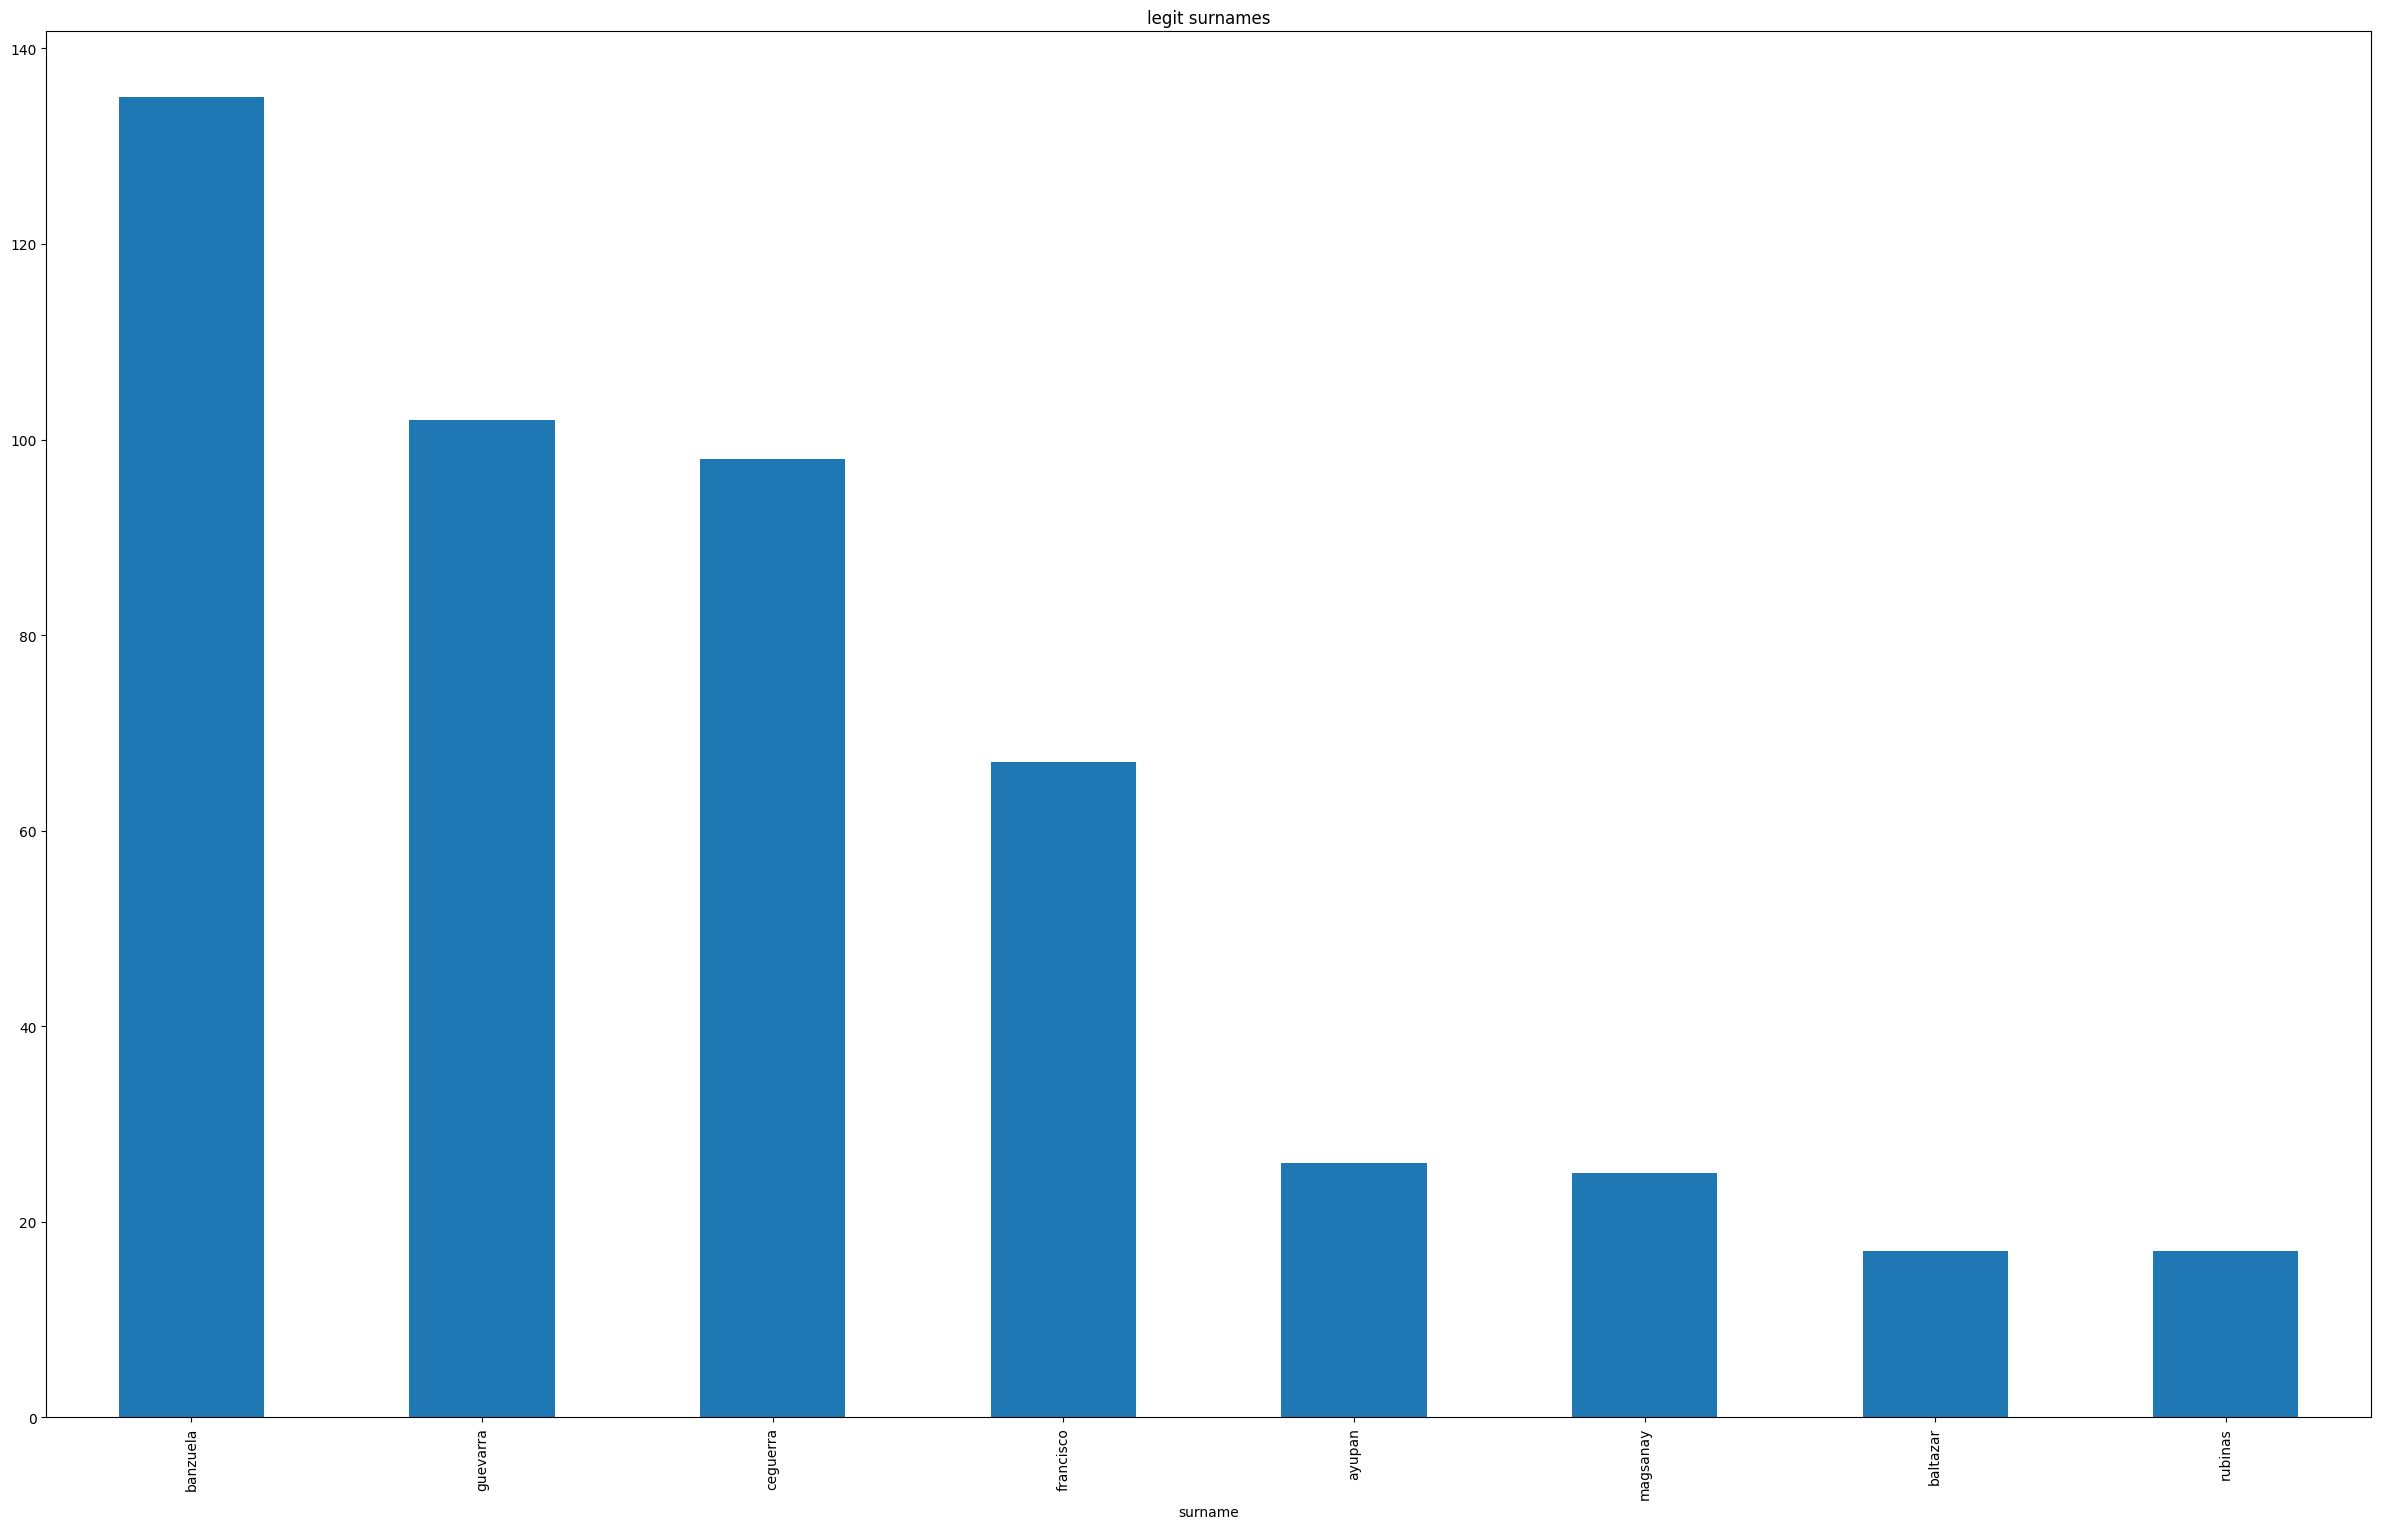

In [63]:
# Plot the number of legit transactions per surname
plt.figure(figsize=(30, 18))
not_fraud['surname'].value_counts().loc[lambda x: x > 15].plot(kind='bar', title='legit surnames')
plt.show()

In [64]:
# Define the surname to check
surname_to_check = 'tan'

# Probability given transaction is fraud
probability_fraud = (fraud['surname'] == surname_to_check).mean()

# Probability given transaction is not fraud
probability_not_fraud = (not_fraud['surname'] == surname_to_check).mean()

probability_random = (df['surname'] == surname_to_check).mean()


# Print probabilities
print(f"Probability of surname '{surname_to_check}' given transaction is fraud: {probability_fraud:.4f}")
print(f"Probability of surname '{surname_to_check}' given transaction is not fraud: {probability_not_fraud:.4f}")
print(f"Probability of surname '{surname_to_check}' given transaction is random: {probability_random:.4f}")

Probability of surname 'tan' given transaction is fraud: 0.0323
Probability of surname 'tan' given transaction is not fraud: 0.0026
Probability of surname 'tan' given transaction is random: 0.0158


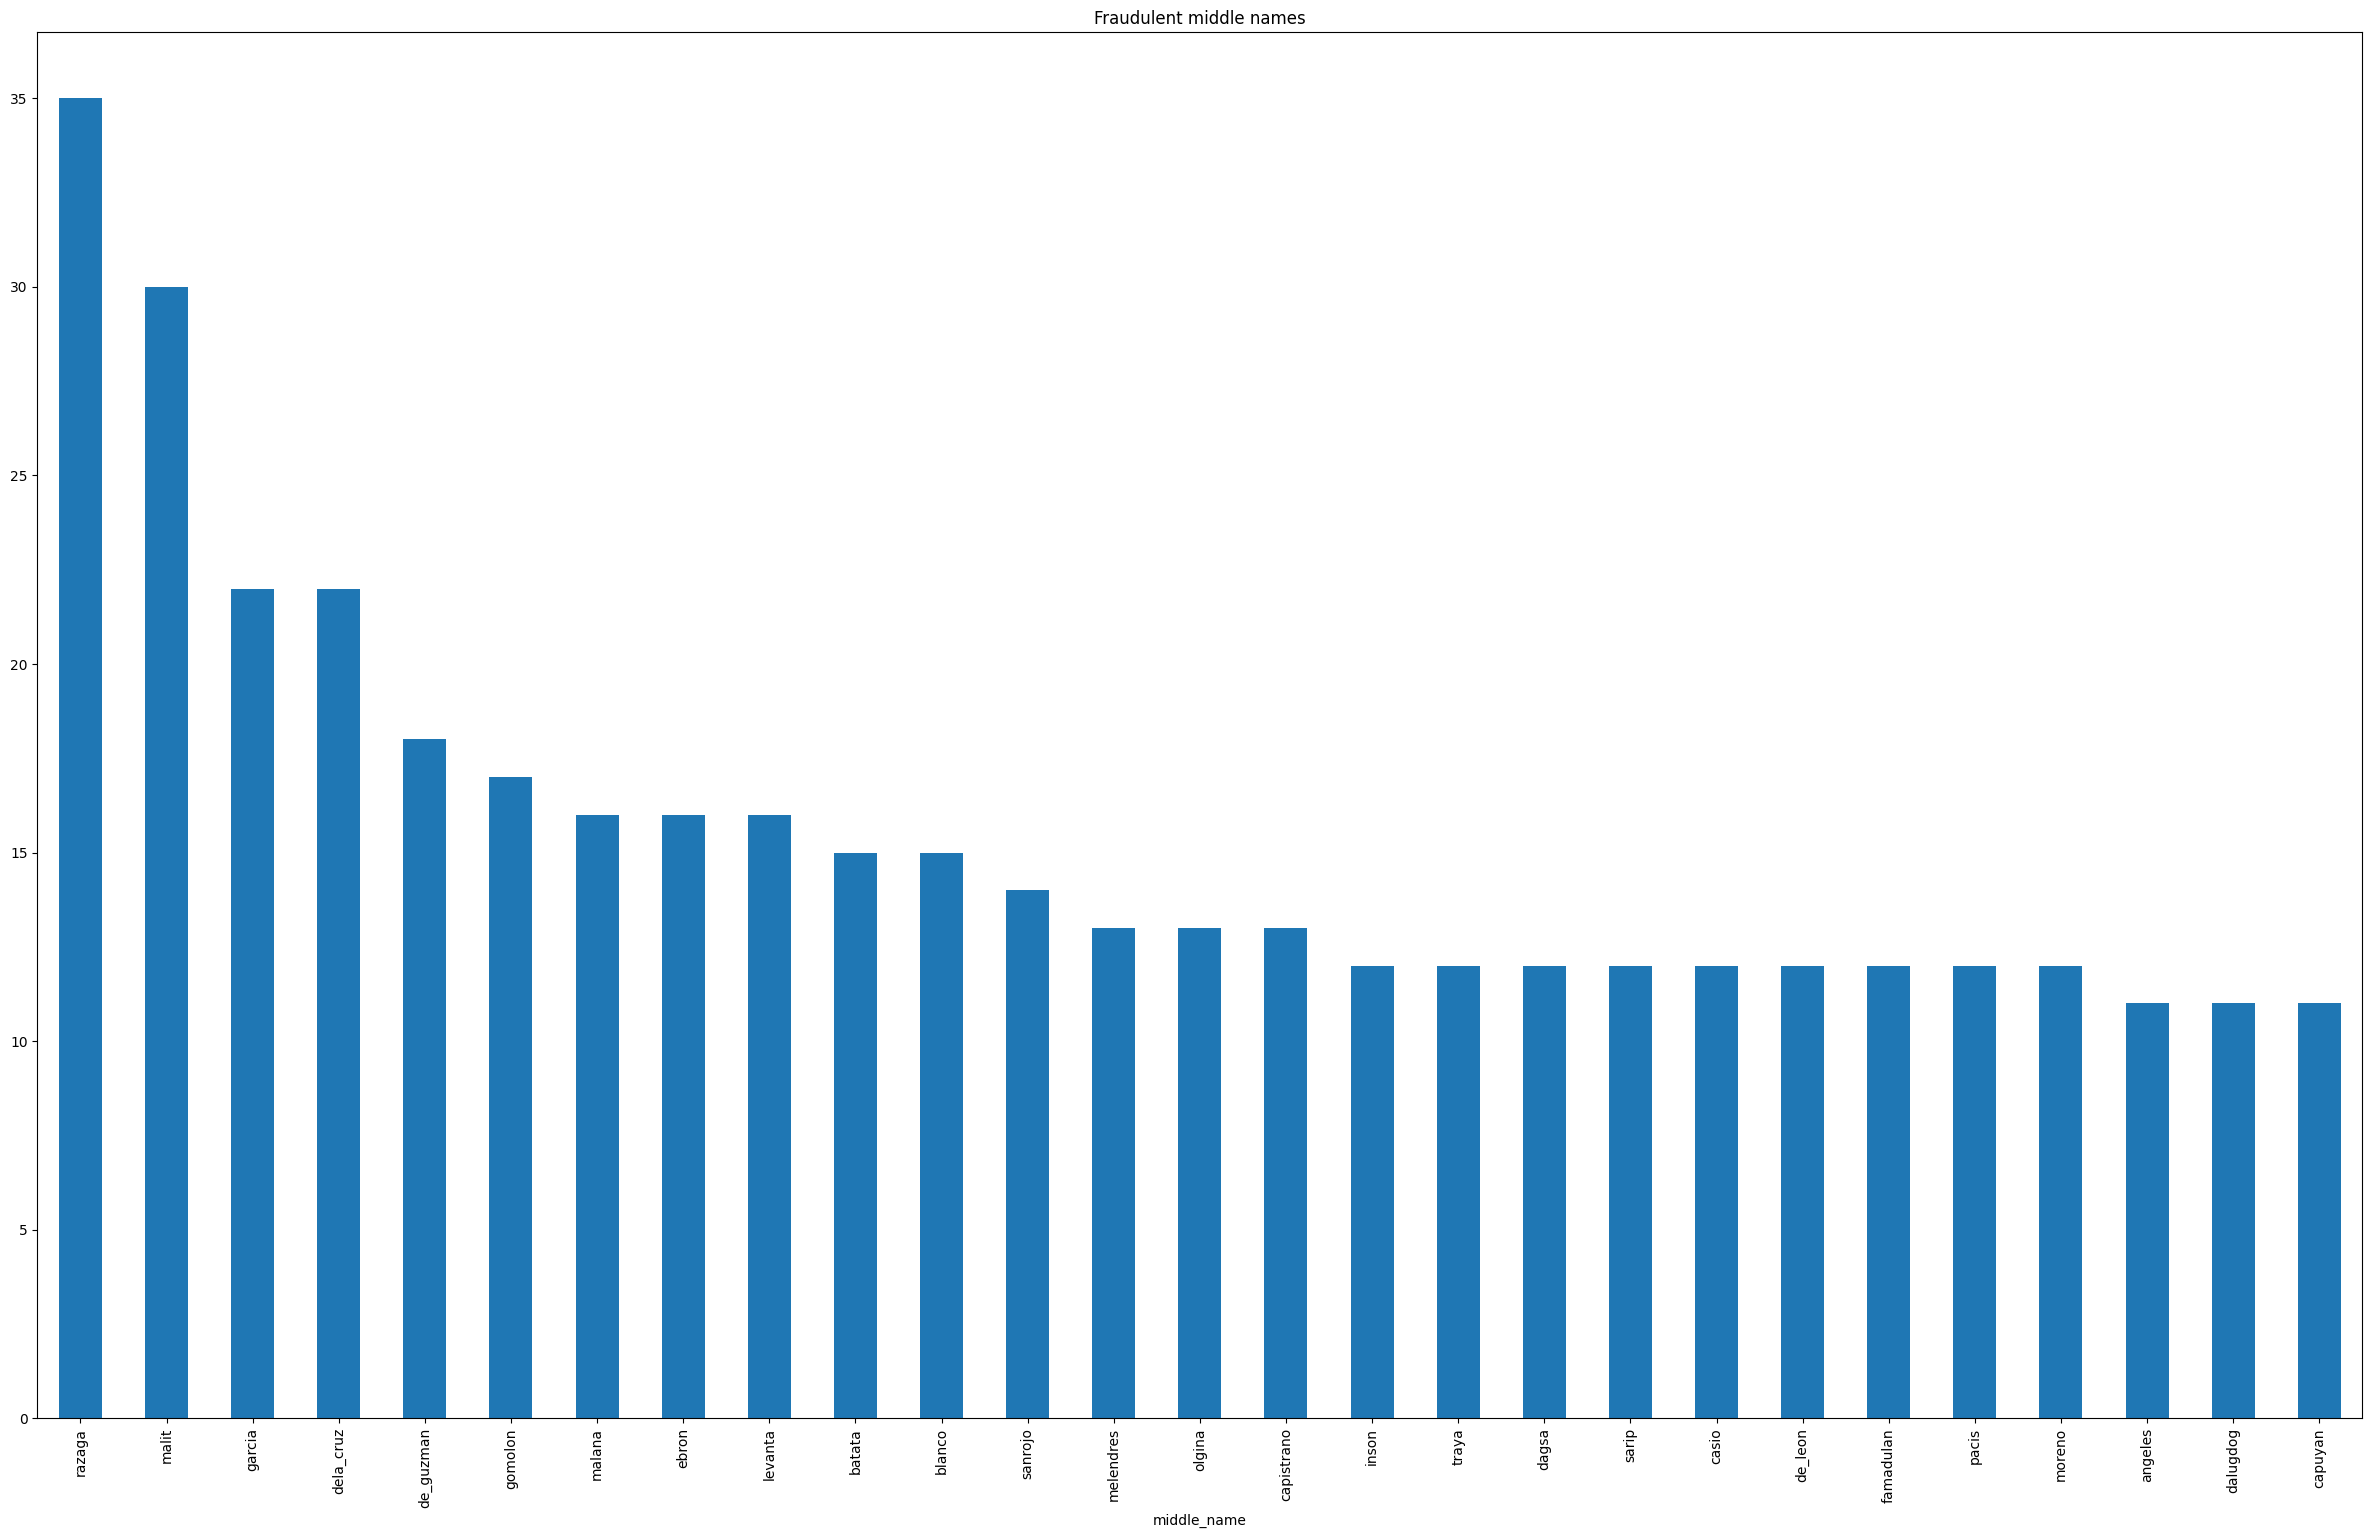

In [65]:
# Plot the number of fraudulent transactions per middle name
plt.figure(figsize=(30, 18))
fraud['middle_name'].value_counts().loc[lambda x: x > 10].plot(kind='bar', title='Fraudulent middle names')
plt.show()

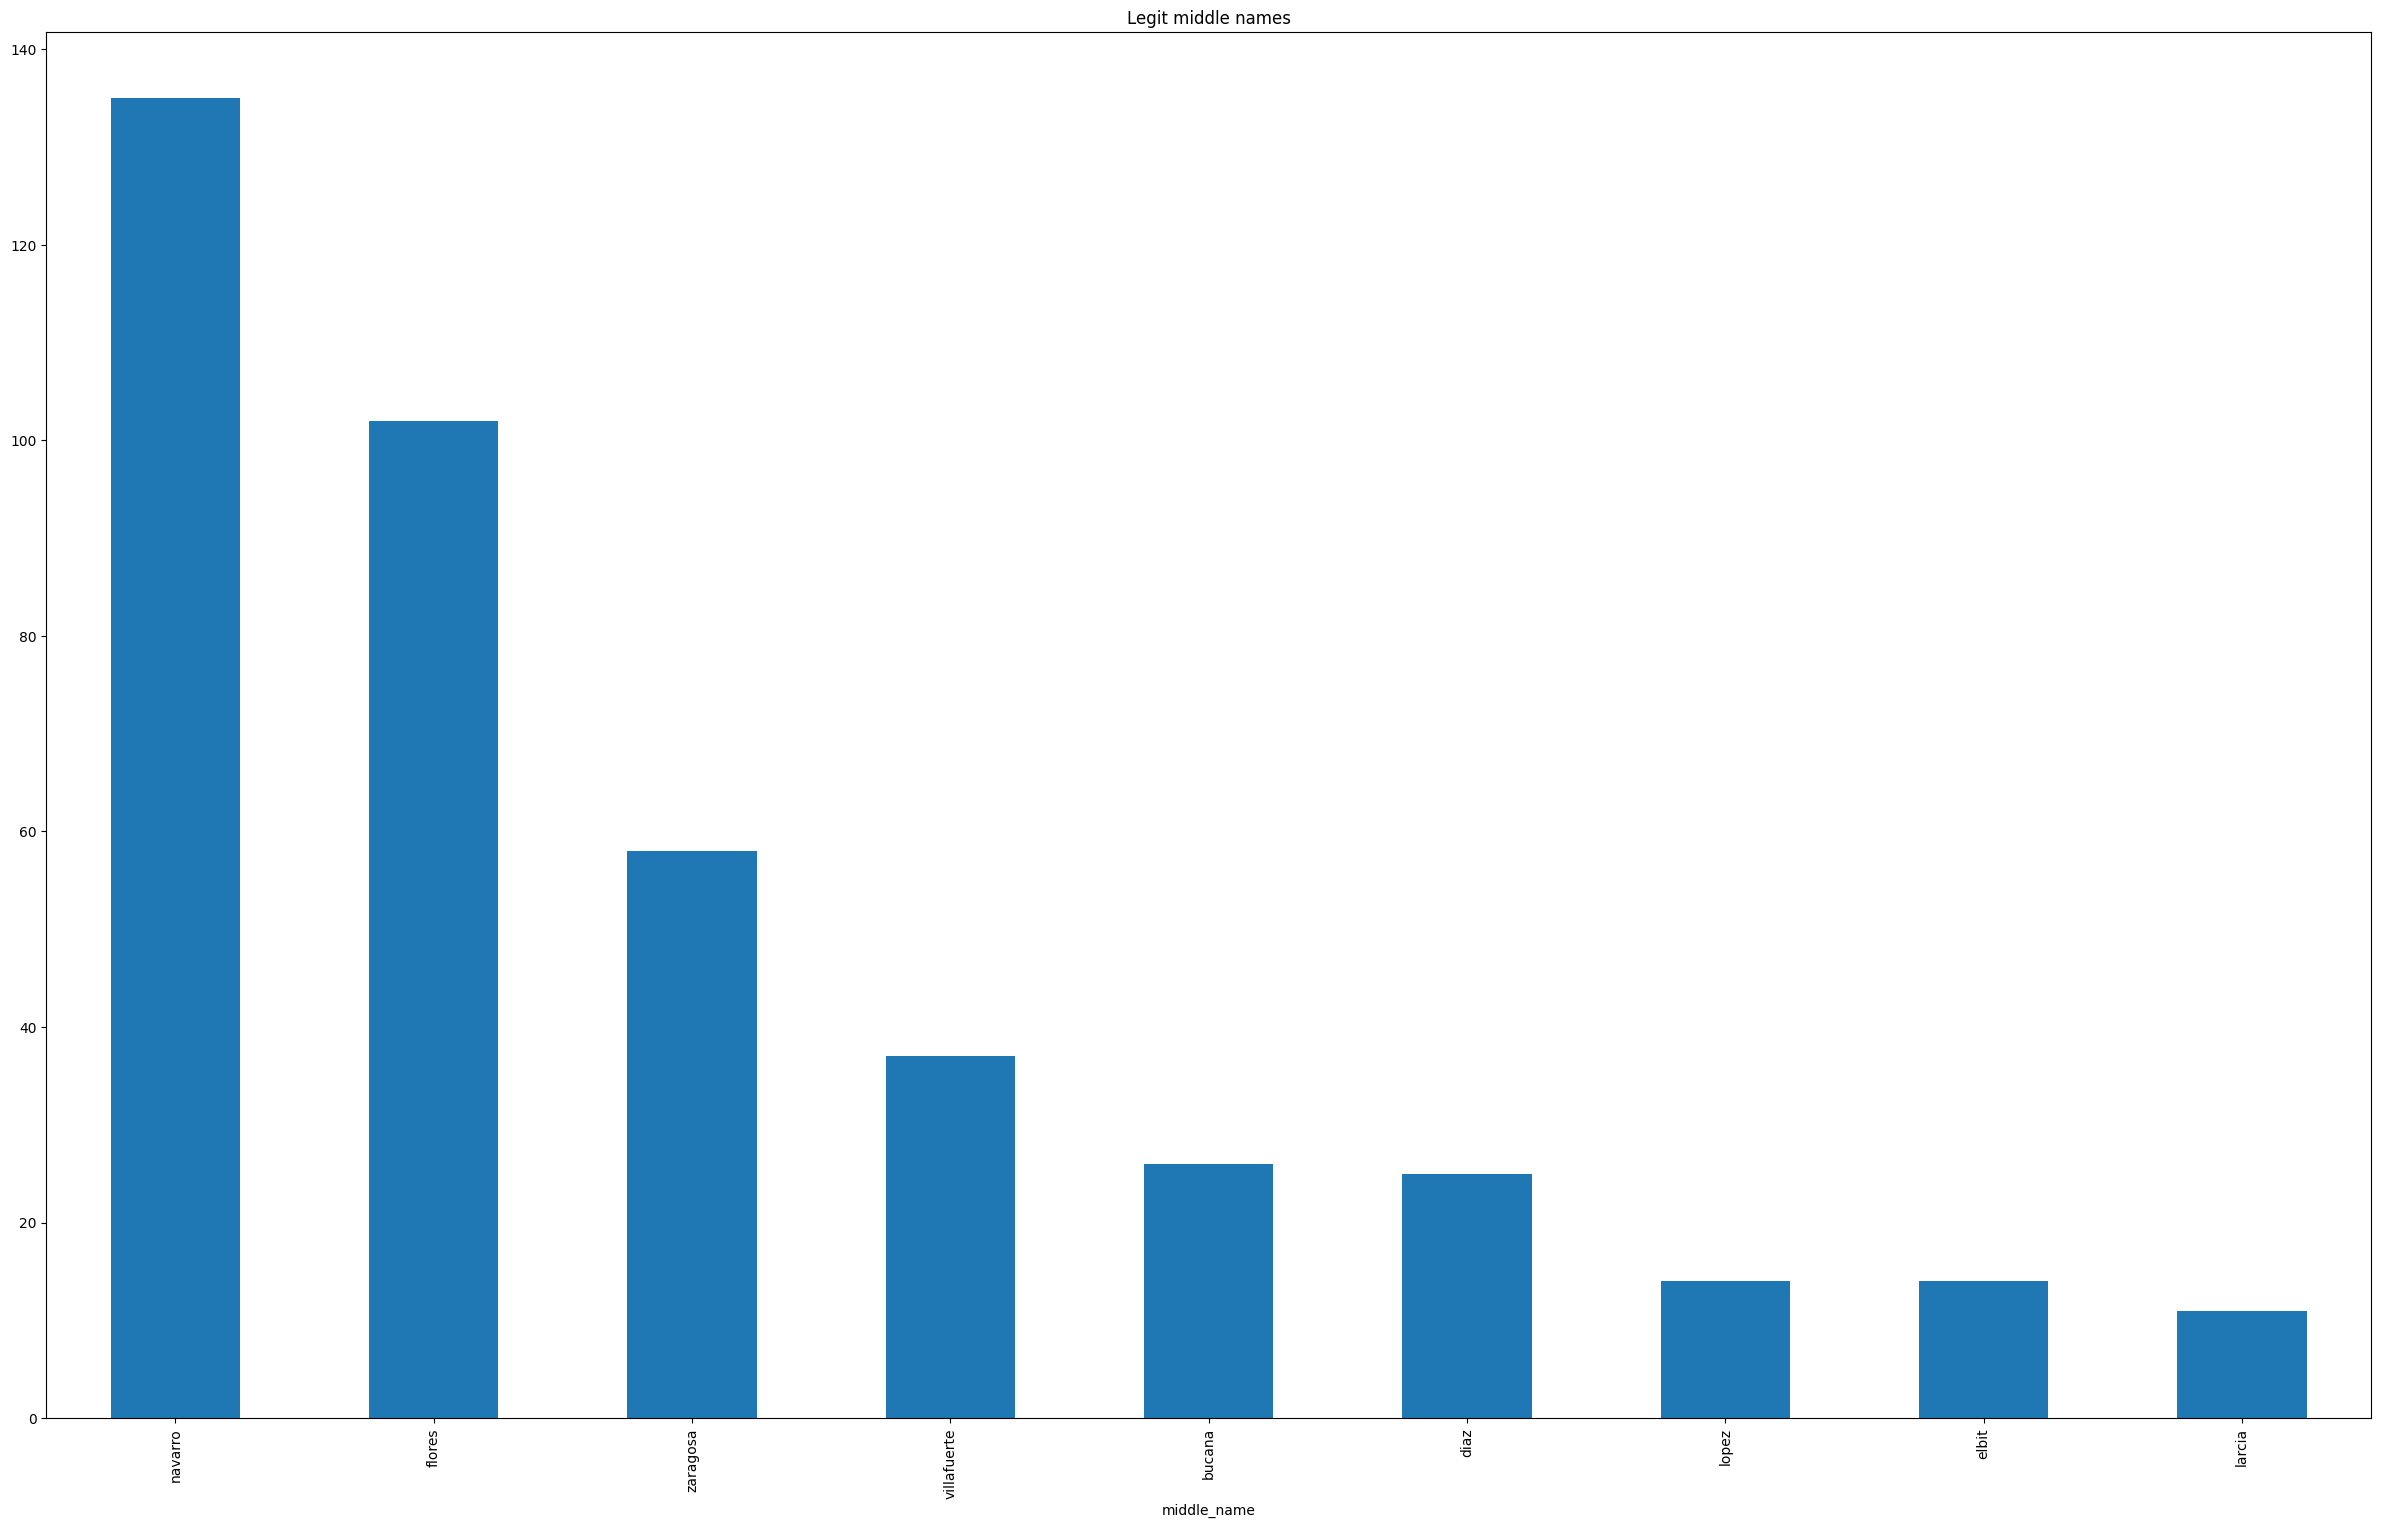

In [66]:
# Plot the number of legit transactions per middle name
plt.figure(figsize=(30, 18))
not_fraud['middle_name'].value_counts().loc[lambda x: x > 10].plot(kind='bar', title='Legit middle names')
plt.show()

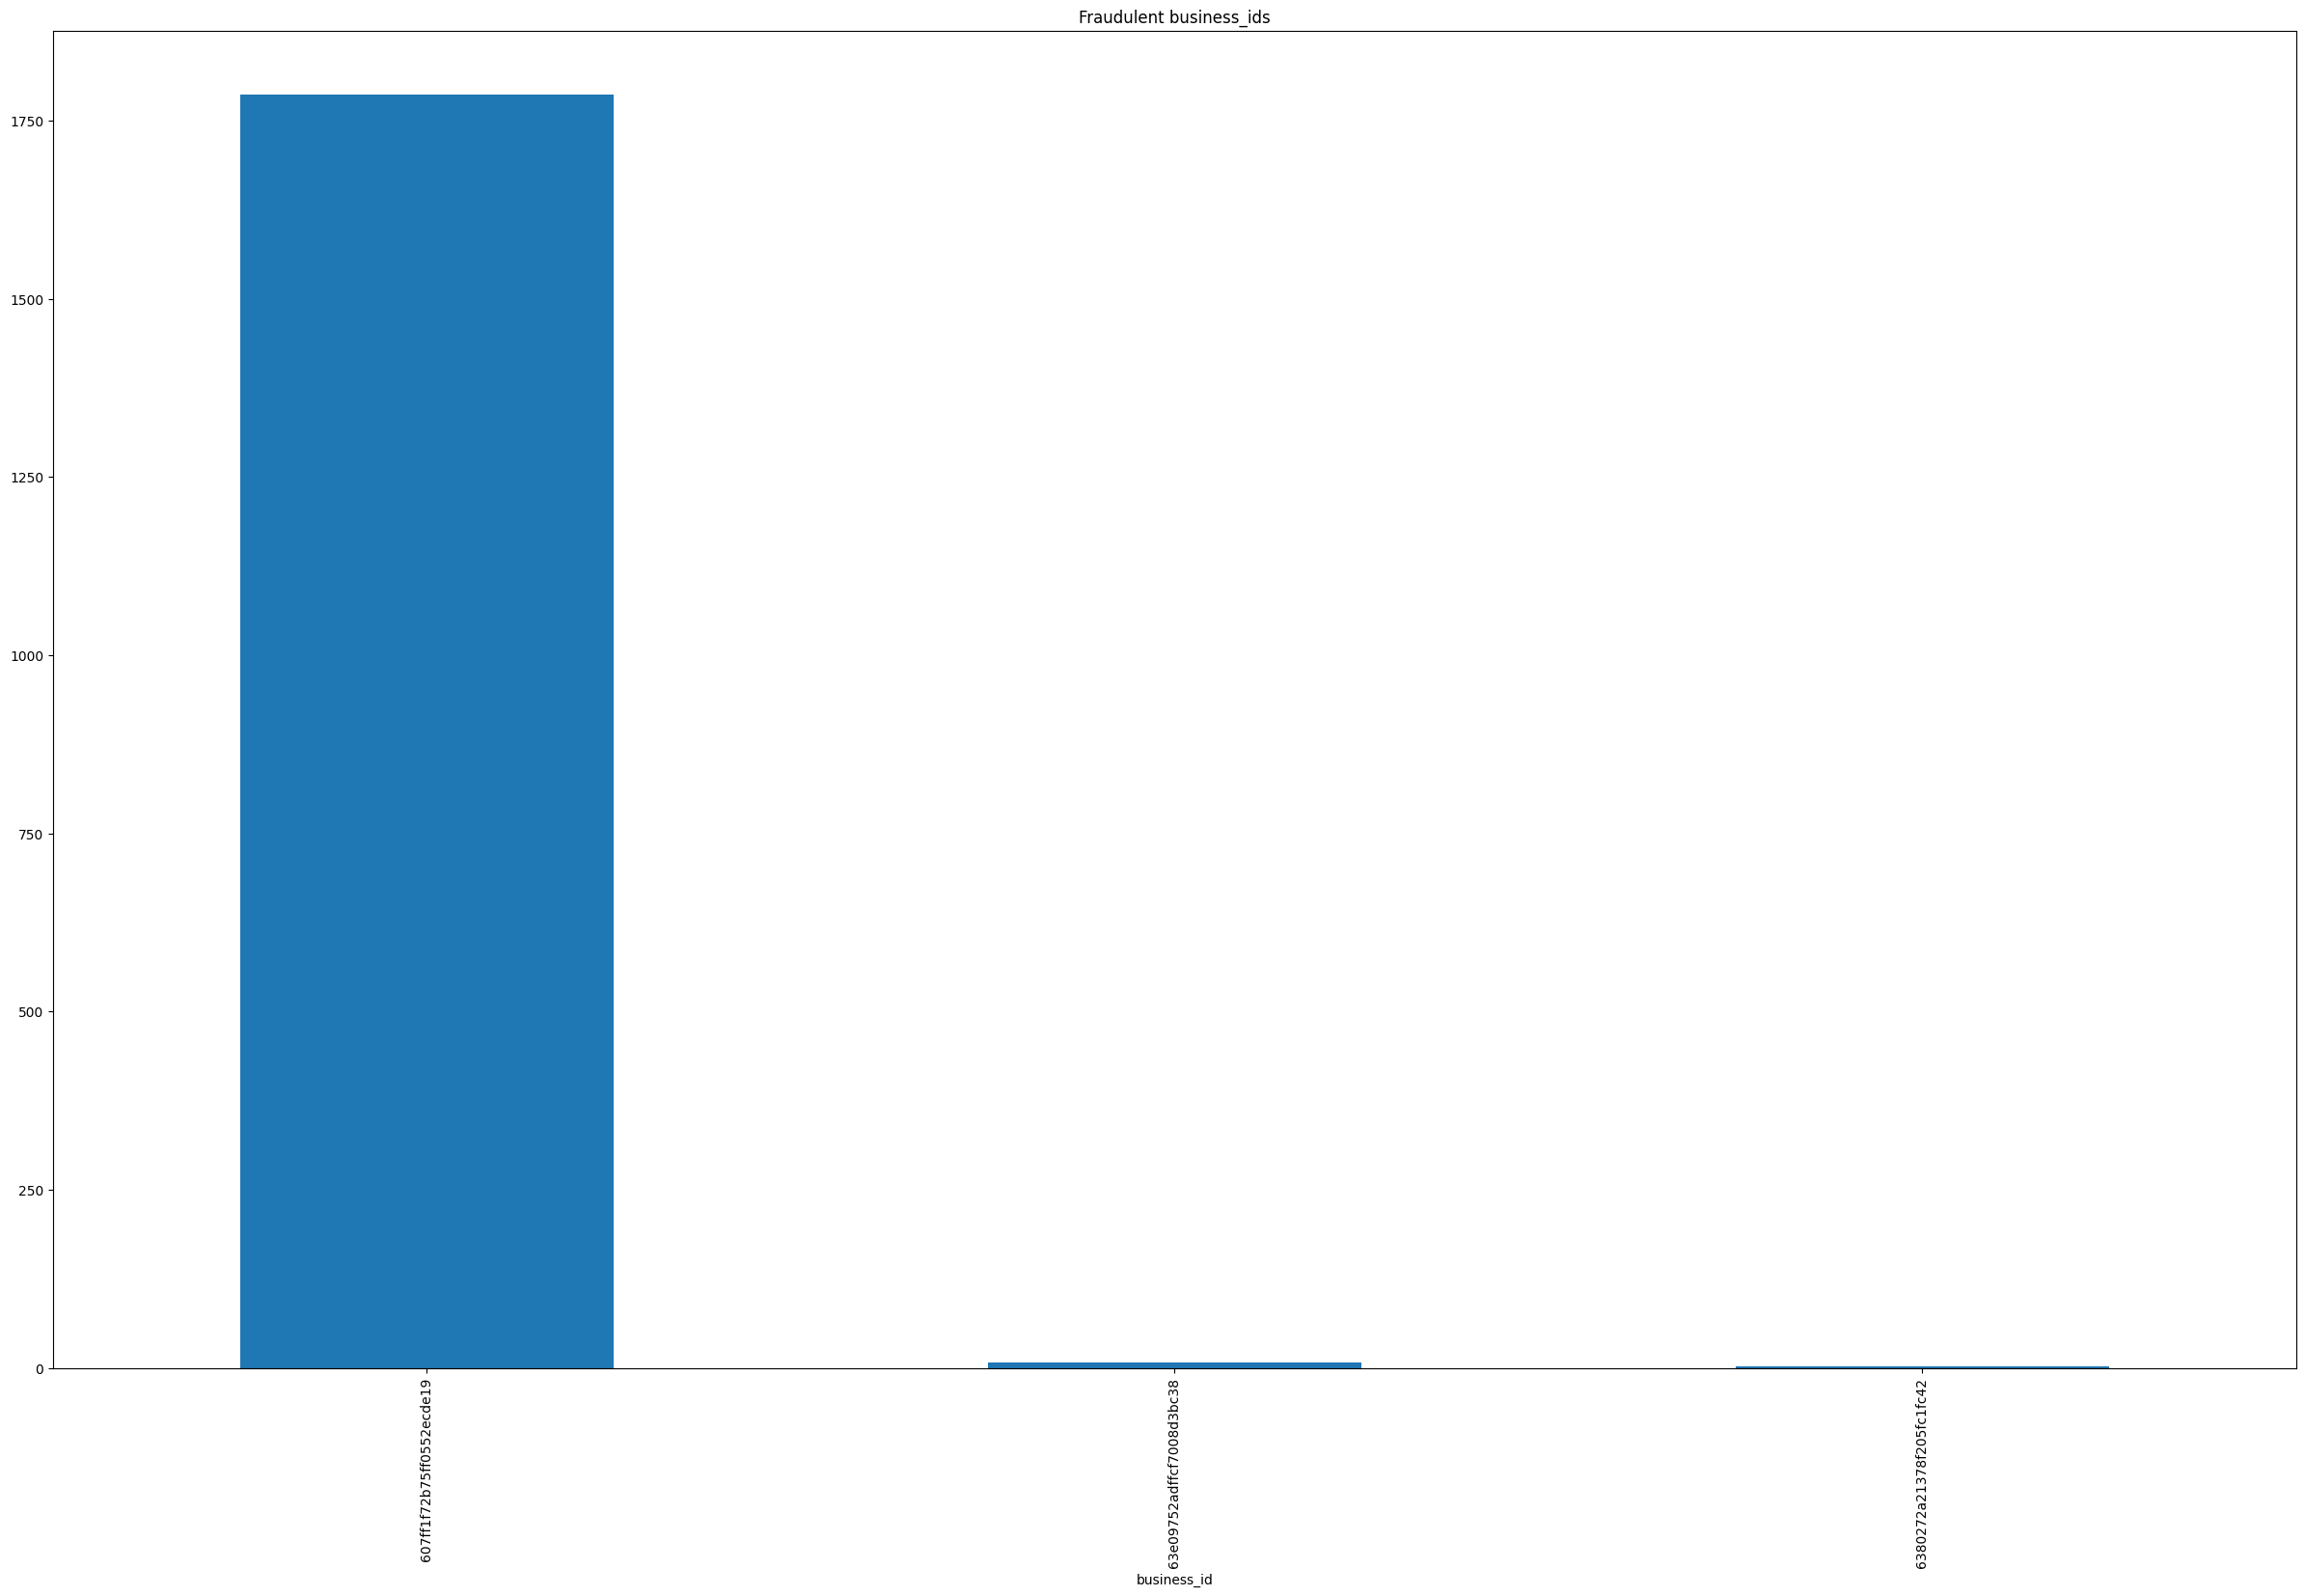

In [67]:
# Plot the number of fraudulent transactions per business_id
plt.figure(figsize=(30, 18))
fraud['business_id'].value_counts().loc[lambda x: x > 0].plot(kind='bar', title='Fraudulent business_ids')
plt.show()

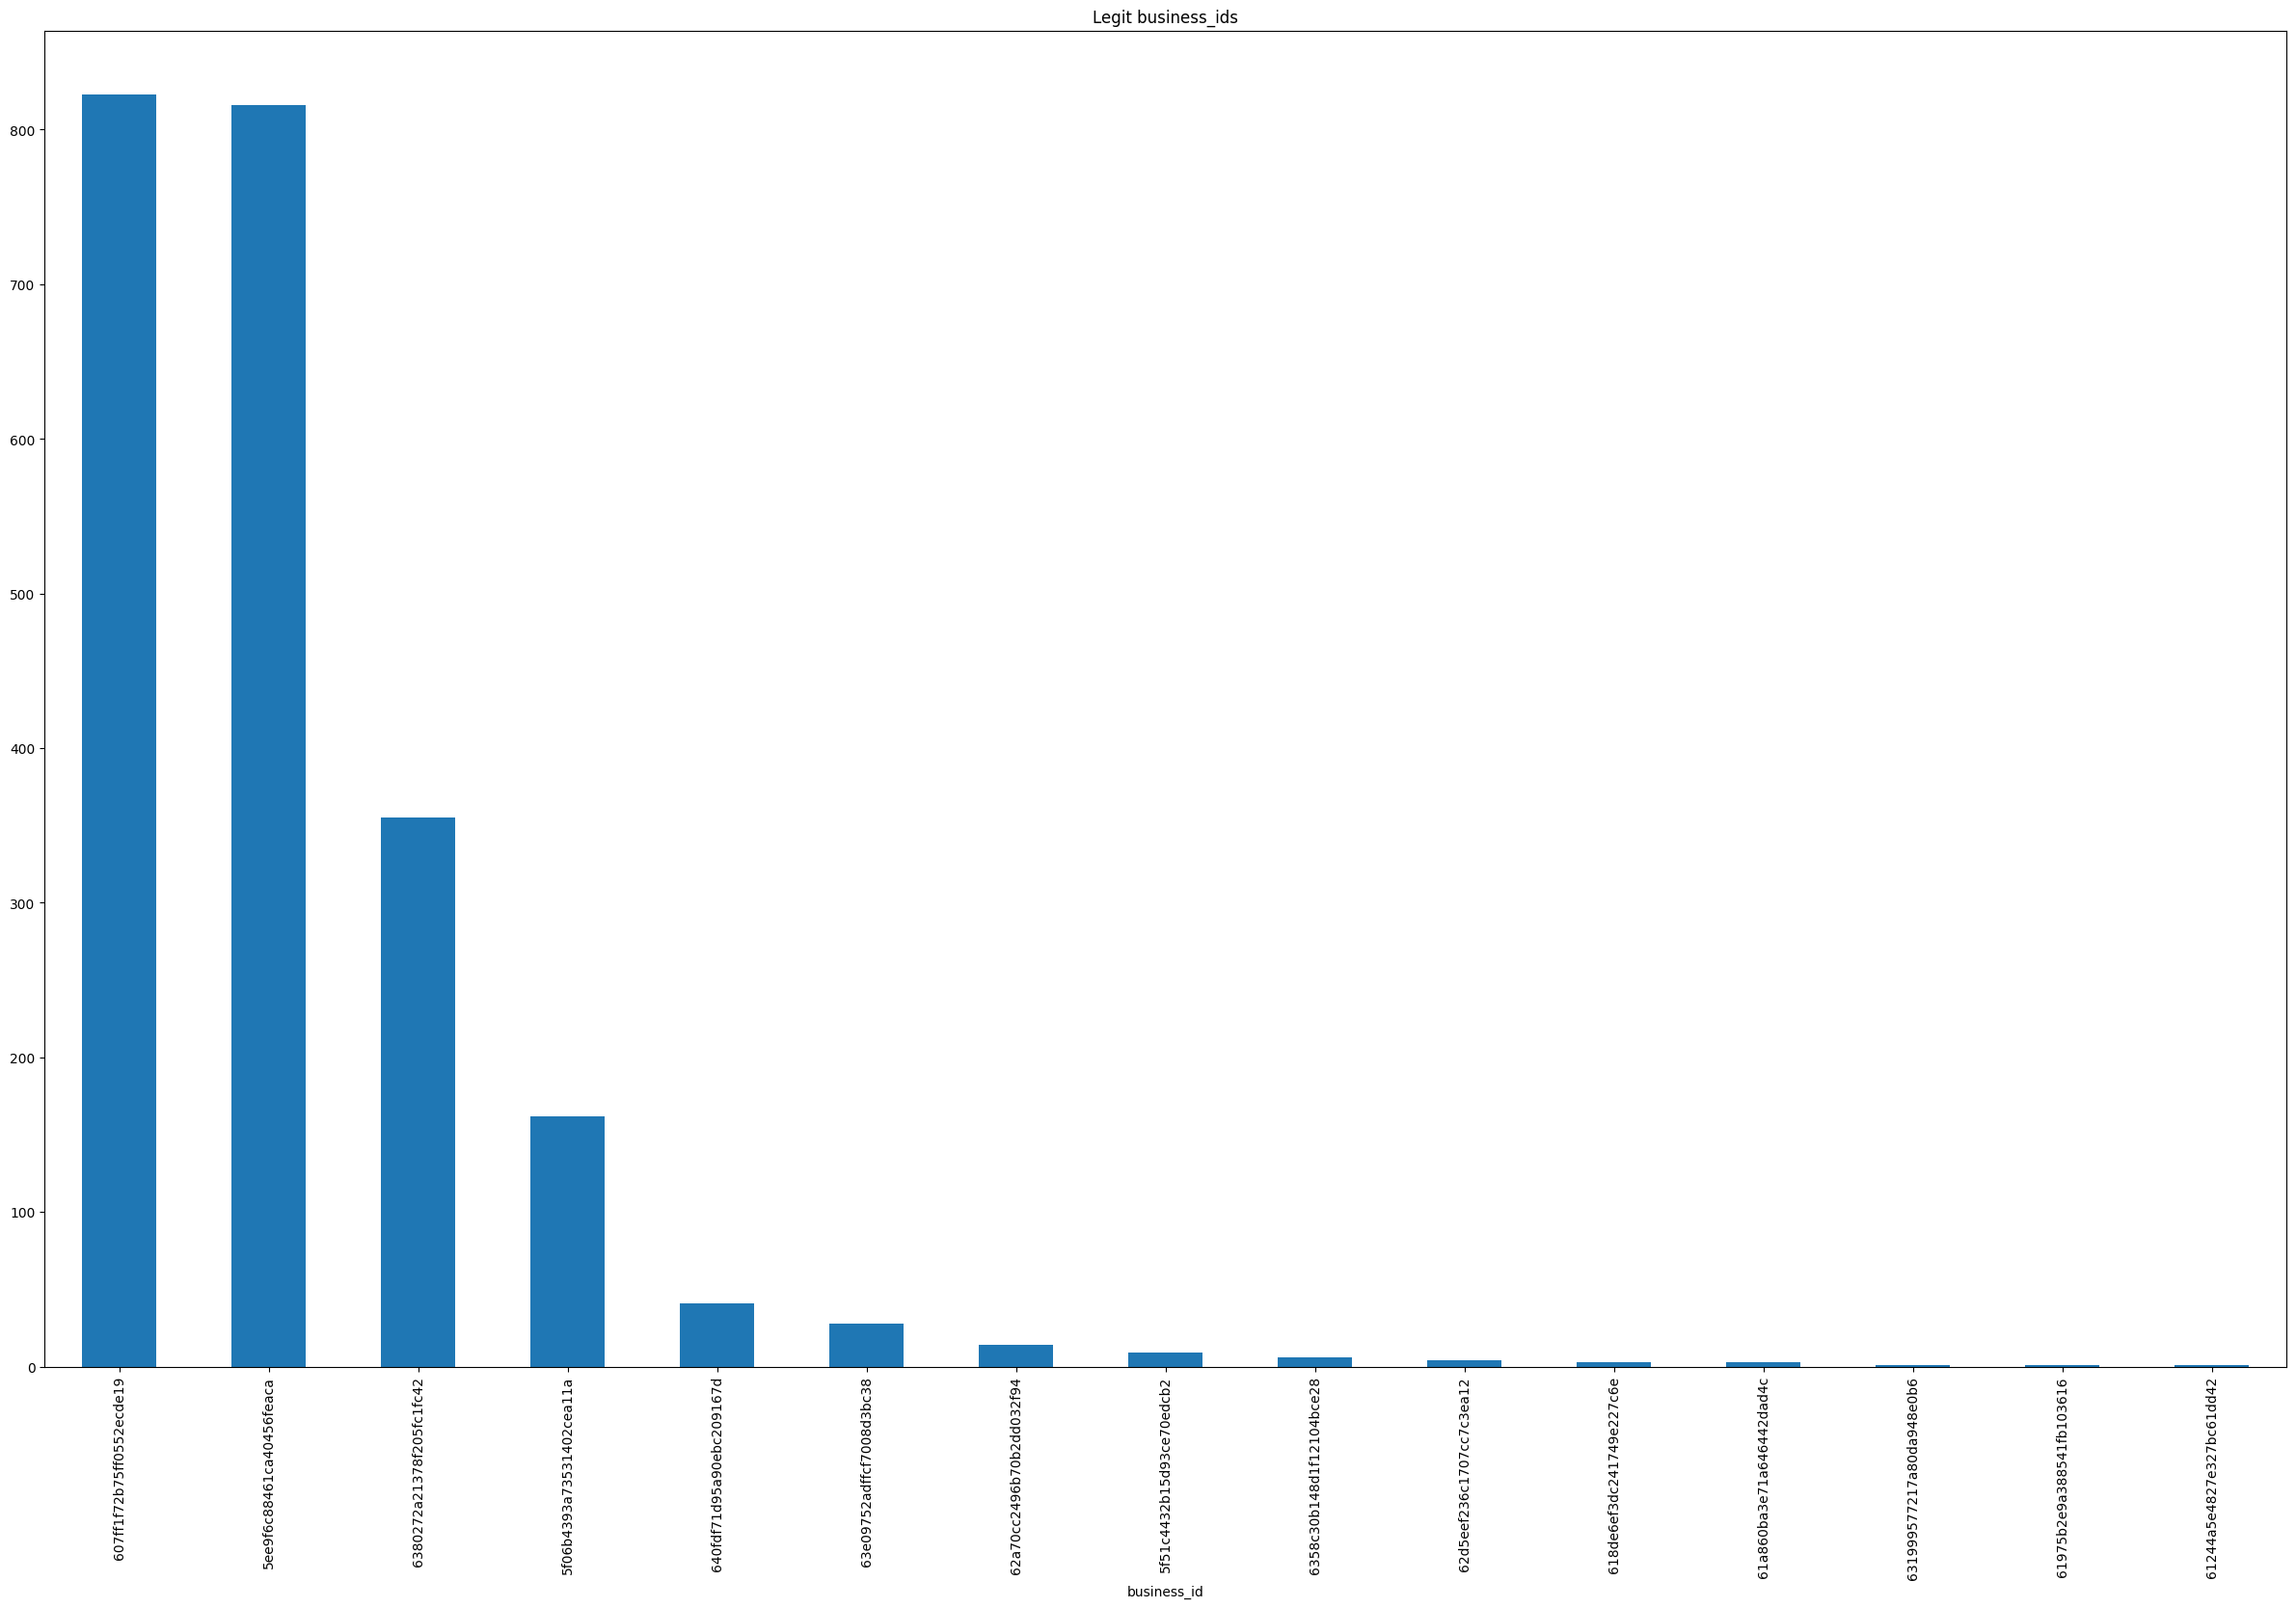

In [68]:
# Plot the number of legit transactions per business_id
plt.figure(figsize=(30, 18))
not_fraud['business_id'].value_counts().loc[lambda x: x > 0].plot(kind='bar', title='Legit business_ids')
plt.show()

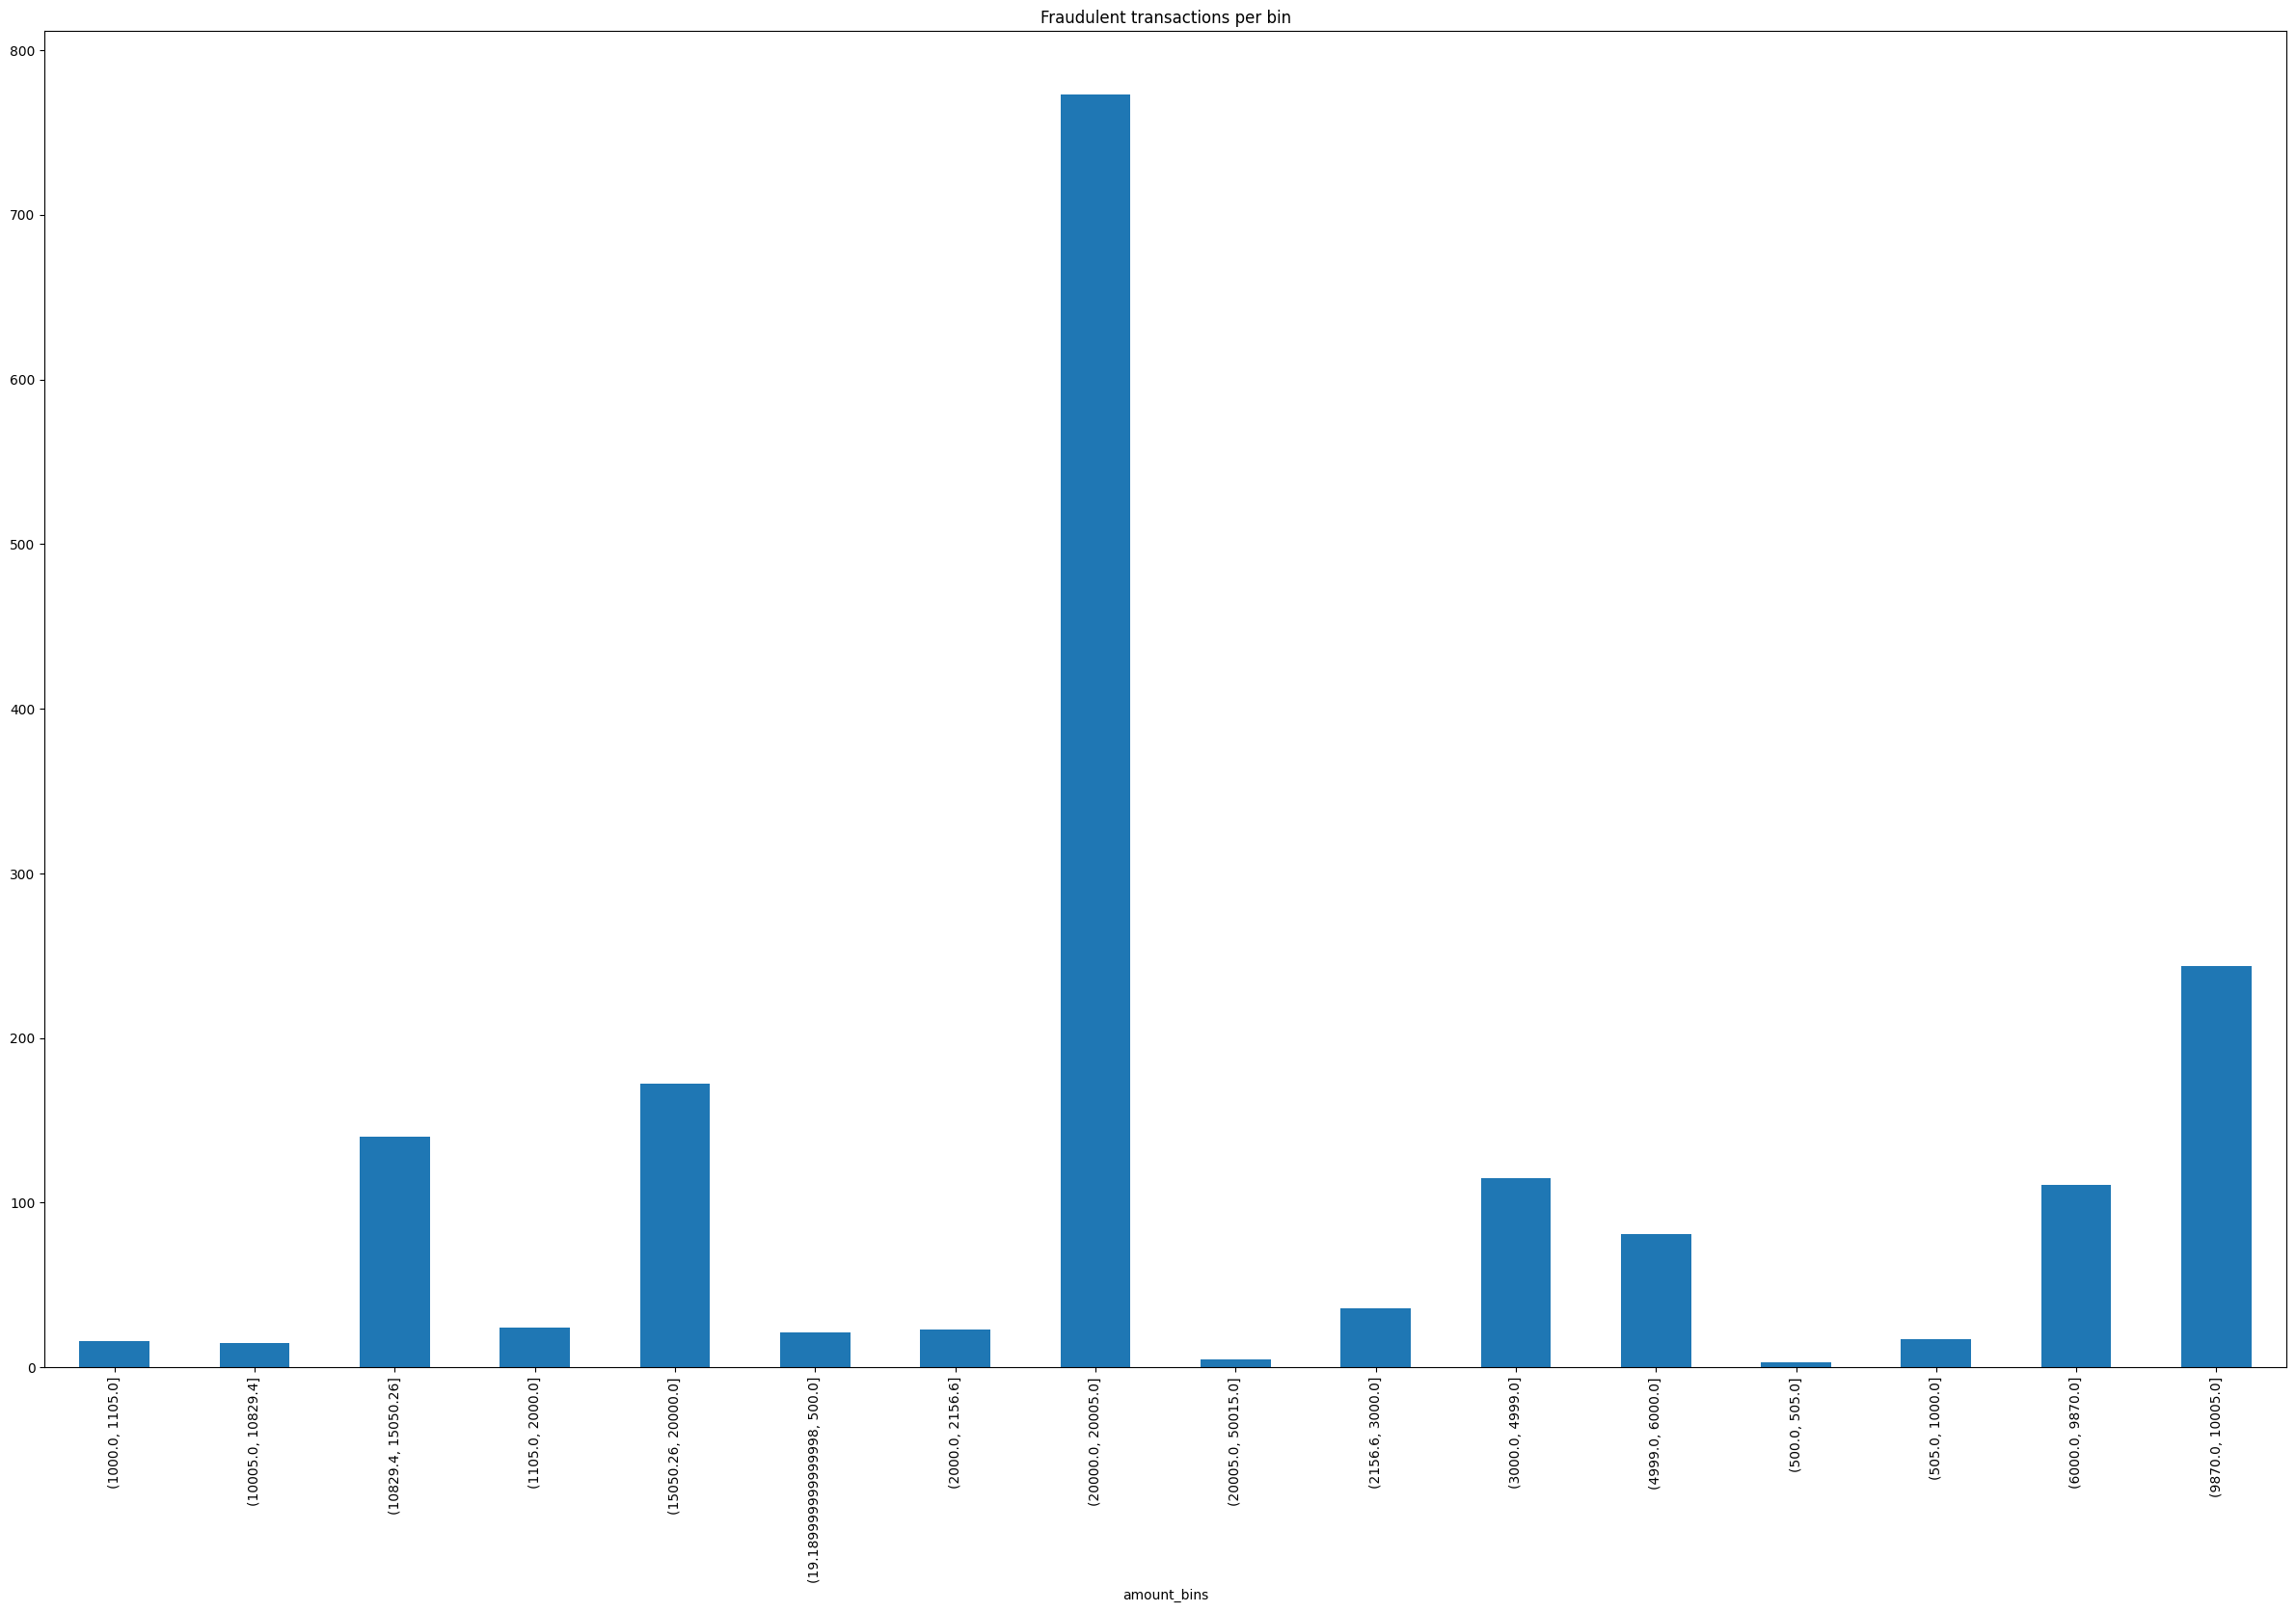

In [69]:
# Plot the number of fraud transactions per bin
plt.figure(figsize=(30, 18))
fraud['amount_bins'].value_counts().sort_index().plot(kind='bar', title='Fraudulent transactions per bin')
plt.show()

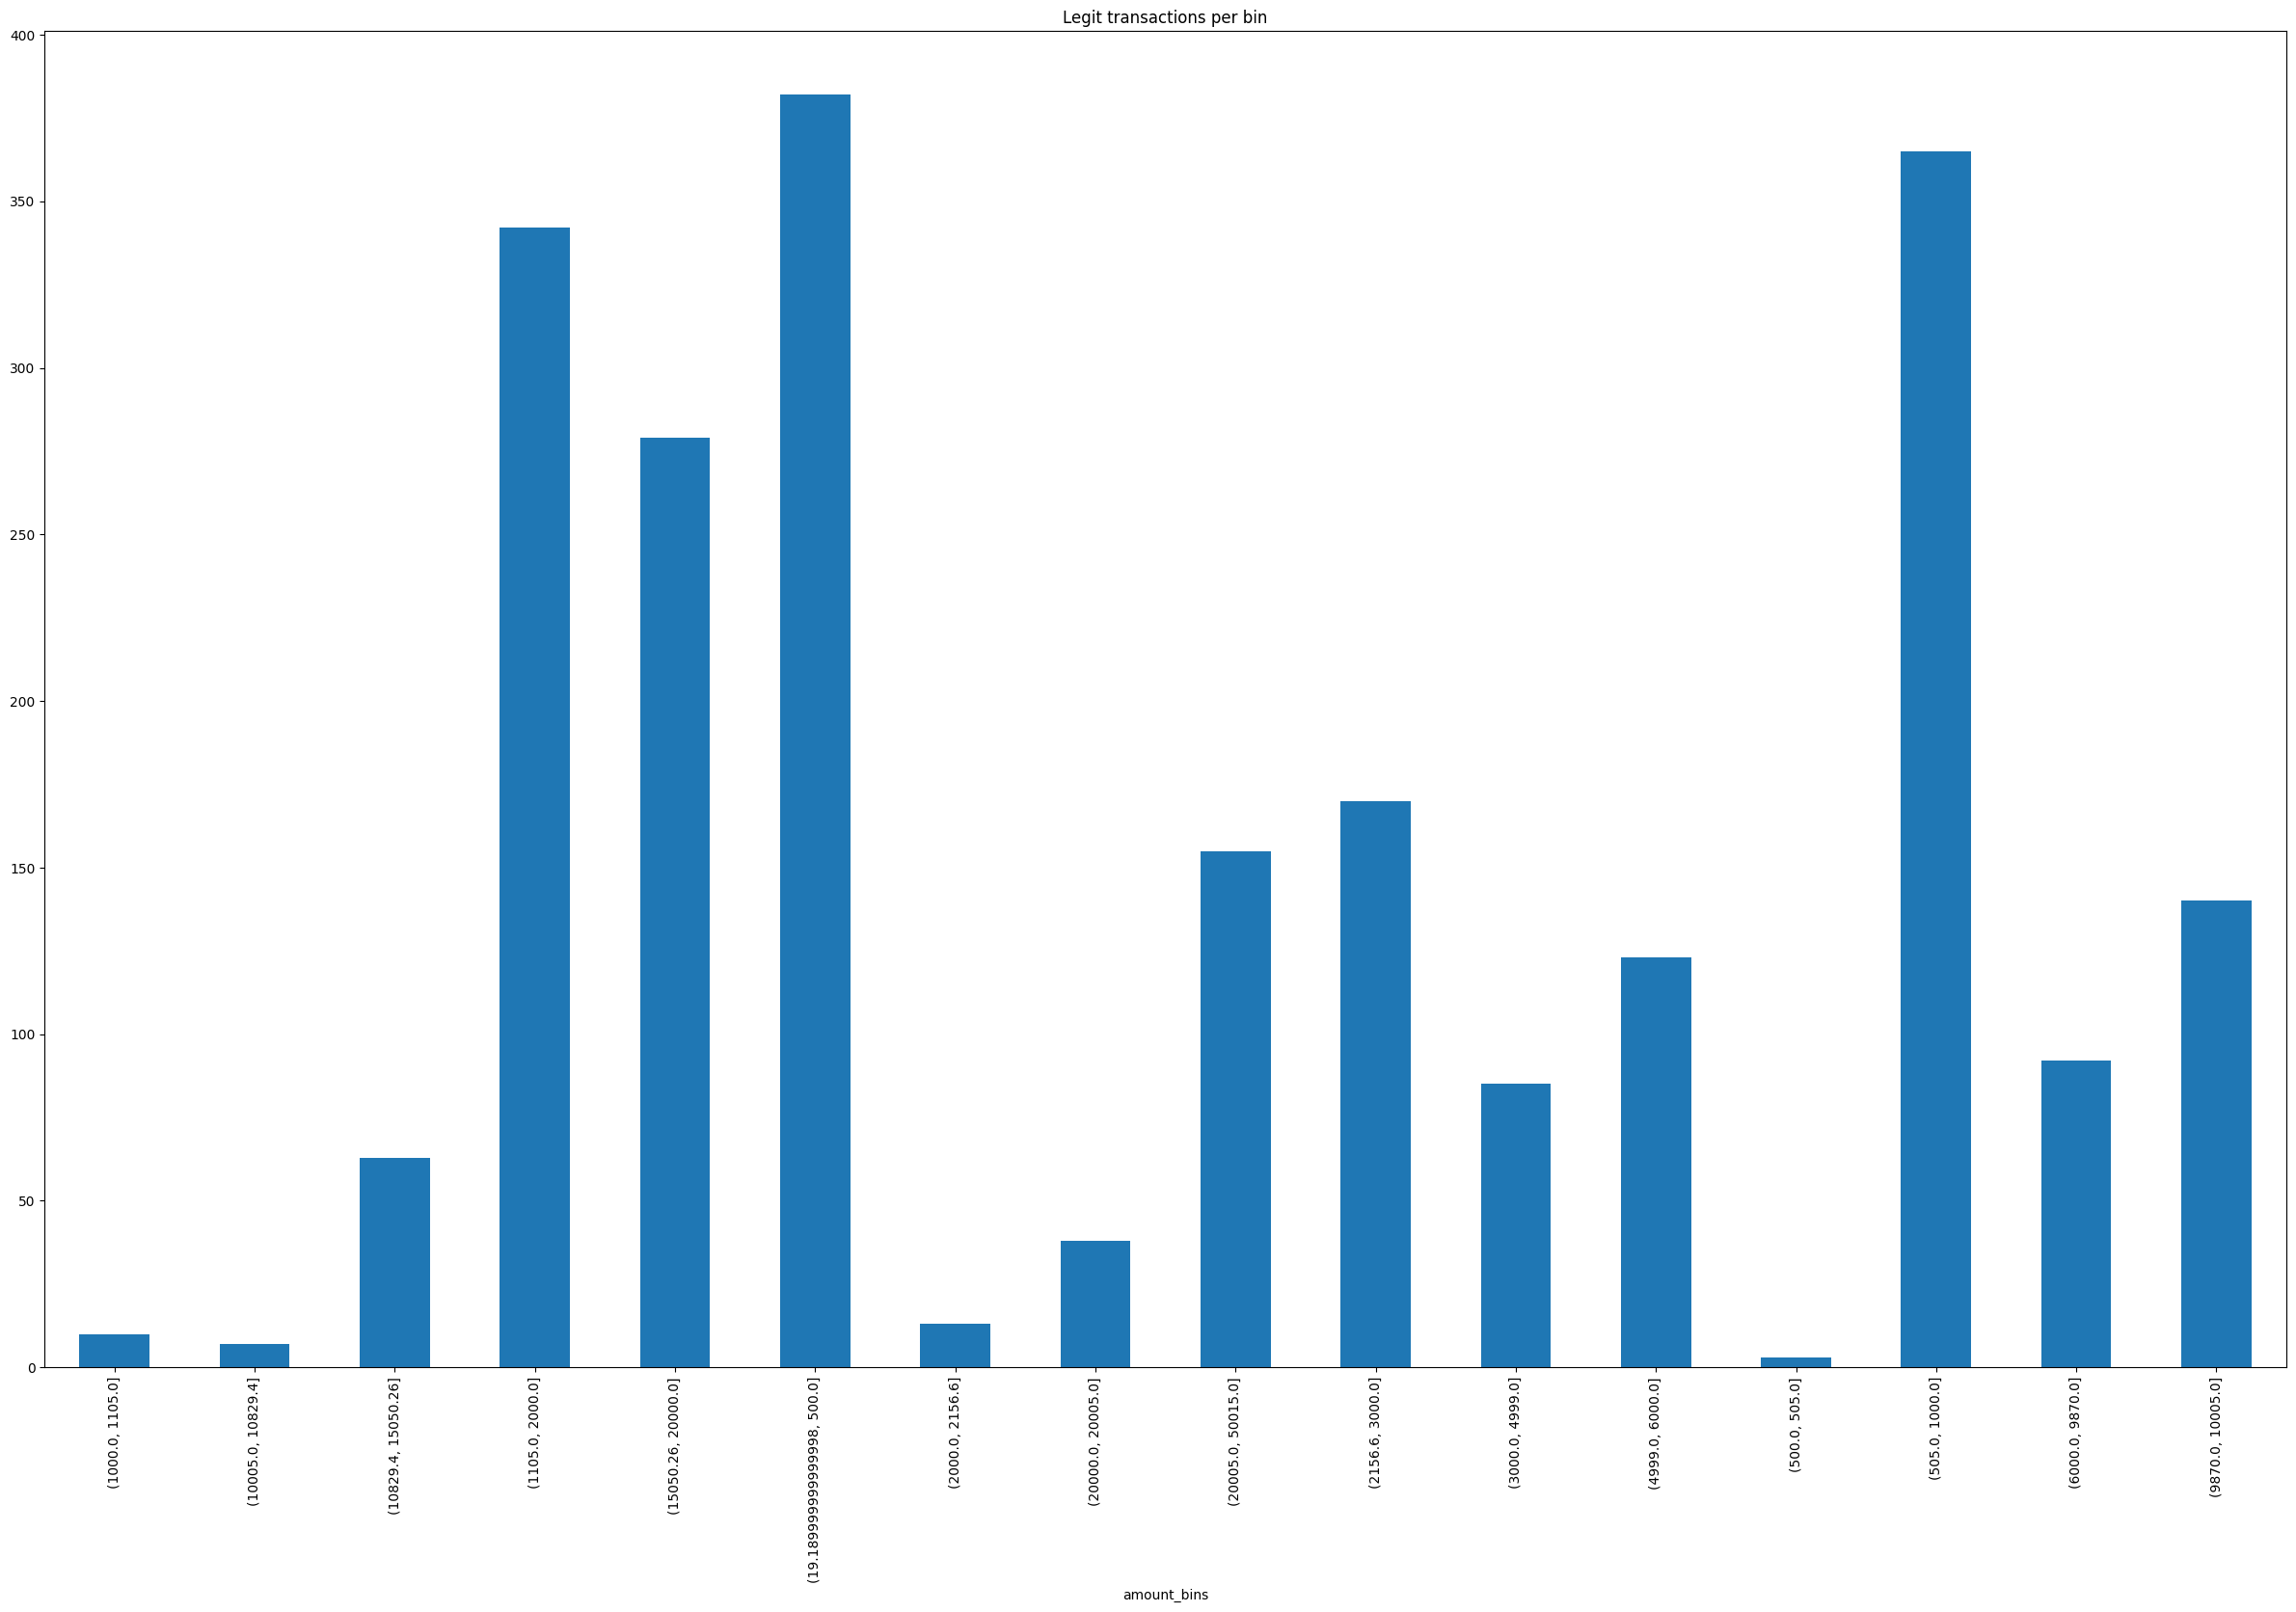

In [70]:
# Plot the number of legit transactions per bin
plt.figure(figsize=(30, 18))
not_fraud['amount_bins'].value_counts().sort_index().plot(kind='bar', title='Legit transactions per bin')
plt.show()

In [71]:

bin = 15
# Filter the DataFrame for bin
bin_range = fraud[fraud['amount_bins'] == bin]['amount']

# Print out the range of values in bin 8
print(f"Range of values in bin {bin}:")
print(f"Min value: {bin_range.min()}")
print(f"Max value: {bin_range.max()}")



Range of values in bin 15:
Min value: nan
Max value: nan


In [72]:
# Filter out 'surname' == 'tan'
print(df.columns)
df_filtered = df[df['surname'] == 'pomperada']
df_filtered = df_filtered[['surname','middle_name','given_names','created','time','customer_id', 'account_hash','end_customer_id', 'is_fraud']]

Index(['success_redirect_url', 'account_details', 'expires_at',
       'refunded_amount', 'payment_channel_transaction_id',
       'linked_account_id', 'settlement_date', 'failure_code', 'callback_url',
       'status', 'channel_account_reference', 'updated', 'checkout_url',
       'client_type', 'id', 'payment_channel_verification_id',
       'idempotency_key', 'ledger_transaction_id', 'time', 'given_names',
       'business_id', 'end_customer_id', 'created', 'middle_name', 'amount',
       'email', 'channel_code', 'failure_redirect_url', 'customer_id',
       'required_action', 'surname', 'payment_channel_reference_id',
       'account_hash', 'dt', 'account_type', 'bank_acc',
       'otp_expiration_timestamp', 'payment_method_id', 'reference_id',
       'enable_otp', 'is_fraud', 'amount_bins', 'refunded_amount_bins'],
      dtype='object')


In [73]:
# Compare columns
equal_rows = df['customer_id'] == df['end_customer_id']

# Count equal and not equal rows
num_equal = equal_rows.sum()
num_not_equal = len(df) - num_equal

# Print results
print(f"Number of equal rows: {num_equal}")
print(f"Number of not equal rows: {num_not_equal}")

Number of equal rows: 2748
Number of not equal rows: 1315
